In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_AW_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113,NaN,3.49,NaN,NaN,7.80,NaN,NaN,NaN
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120,NaN,0.68,NaN,NaN,9.30,NaN,NaN,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	8
float64		column 3	0
float64		column 4	7
int64		column 5	0
float64		column 6	21
float64		column 7	15
float64		column 8	21
float64		column 9	36
float64		column 10	0
float64		column 11	36
float64		column 12	36
float64		column 13	36


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,178.000000,170.000000,178.000000,171.000000,178.000000,157.000000,163.000000,157.000000,142.000000,178.000000,142.000000,142.000000,142.000000
mean,13.000618,2.339824,2.366517,19.398830,99.741573,2.242675,1.999141,0.362484,1.558592,5.058090,0.960676,2.581268,741.556338
std,0.811827,1.120855,0.274344,3.279096,14.282484,0.616678,0.970732,0.125098,0.585689,2.318286,0.225554,0.717196,303.717990
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.540000,1.270000,290.000000
25%,12.362500,1.610000,2.210000,17.150000,88.000000,1.700000,1.095000,0.270000,1.140000,3.220000,0.772500,1.822500,510.000000
50%,13.050000,1.865000,2.360000,19.400000,98.000000,2.200000,2.140000,0.340000,1.505000,4.690000,0.980000,2.760000,676.500000
75%,13.677500,3.030000,2.557500,21.500000,107.000000,2.700000,2.790000,0.440000,1.870000,6.200000,1.120000,3.155000,961.750000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,3.930000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

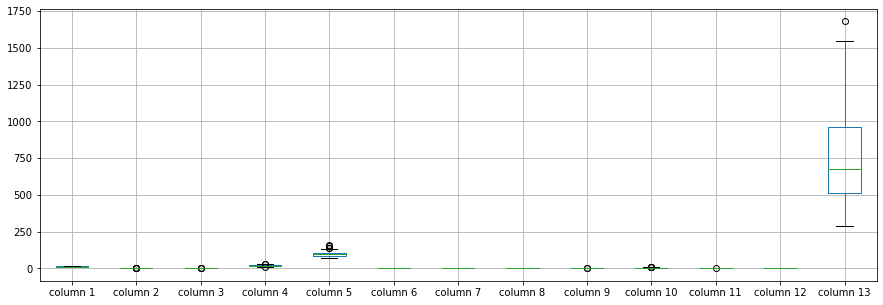

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      13.000618
column 2       2.339824
column 3       2.366517
column 4      19.398830
column 5      99.741573
column 6       2.242675
column 7       1.999141
column 8       0.362484
column 9       1.558592
column 10      5.058090
column 11      0.960676
column 12      2.581268
column 13    741.556338
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.081778,0.211545,-0.277965,0.270798,0.285346,0.274453,-0.205867,0.096655,0.546364,-0.030752,0.139316,0.625925
column 2,0.081778,1.000000,0.163965,0.303915,-0.067002,-0.324970,-0.397421,0.314179,-0.241160,0.231840,-0.581508,-0.380455,-0.160721
column 3,0.211545,0.163965,1.000000,0.410747,0.286587,0.127866,0.067820,0.195808,-0.011944,0.258887,-0.079209,-0.019627,0.226393
column 4,-0.277965,0.303915,0.410747,1.000000,-0.095491,-0.382935,-0.418264,0.418395,-0.229934,0.023172,-0.323180,-0.361919,-0.458078
column 5,0.270798,-0.067002,0.286587,-0.095491,1.000000,0.209999,0.158731,-0.254056,0.288050,0.199950,0.108964,0.079422,0.372091
column 6,0.285346,-0.324970,0.127866,-0.382935,0.209999,1.000000,0.869547,-0.460158,0.620750,-0.057646,0.458775,0.691312,0.496375
column 7,0.274453,-0.397421,0.067820,-0.418264,0.158731,0.869547,1.000000,-0.577575,0.668782,-0.199938,0.606832,0.805521,0.520037
column 8,-0.205867,0.314179,0.195808,0.418395,-0.254056,-0.460158,-0.577575,1.000000,-0.425022,0.145114,-0.311854,-0.545093,-0.316214
column 9,0.096655,-0.241160,-0.011944,-0.229934,0.288050,0.620750,0.668782,-0.425022,1.000000,-0.079474,0.316594,0.549770,0.348203
column 10,0.546364,0.231840,0.258887,0.023172,0.199950,-0.057646,-0.199938,0.145114,-0.079474,1.000000,-0.490768,-0.417171,0.321016


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+54,13+54+54,13+54+54,13+54+54+54+54,13+54+54+54+54+54,13+54+54+54+54+54+54,13+54+54+54+54+54,13+54+54+54+54,13+54+54+54,13+54+54,13+54,13], vae_layer = False, seed = 540)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 794.1399536132812
Epoch: 1 , loss: 792.2963645241477
Epoch: 2 , loss: 790.8568059747869
Epoch: 3 , loss: 780.6643621271306
Epoch: 4 , loss: 790.9800026633523
Epoch: 5 , loss: 776.9605379971591
Epoch: 6 , loss: 790.2028253728694
Epoch: 7 , loss: 789.1727239435369
Epoch: 8 , loss: 794.0863647460938
Epoch: 9 , loss: 782.9220359108665
Epoch: 10 , loss: 790.712197043679
Epoch: 11 , loss: 791.0616122159091
Epoch: 12 , loss: 780.975996537642
Epoch: 13 , loss: 786.2649869051846
Epoch: 14 , loss: 784.4020718661221
Epoch: 15 , loss: 786.9343816583806
Epoch: 16 , loss: 788.7901278409091
Epoch: 17 , loss: 787.2850508256392
Epoch: 18 , loss: 788.7800403941761
Epoch: 19 , loss: 780.1566273082386
Epoch: 20 , loss: 789.1642067649148
Epoch: 21 , loss: 785.6679742986506
Epoch: 22 , loss: 790.6171209161931
Epoch: 23 , loss: 786.9061334783381
Epoch: 24 , loss: 787.3743563565341
Epoch: 25 , loss: 792.4805963689631
Epoch: 2

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0,-3.787149,0.0,-0.187394,-2.119246,0.0,-0.802031,-3.387742,-1479.937795
4,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
174,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
175,0.0,0.0,0.0,0.0,0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
176,0.0,0.0,0.0,0.0,0,-1.582951,0.0,-0.474181,-1.395875,0.0,-0.537877,-1.553392,-839.934629


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(5075.22199356091, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.46569881211153064

In [18]:
new_df.iloc[66,:]

column 1      13.11
column 2       1.01
column 3       1.70
column 4      15.00
column 5      78.00
column 6       2.98
column 7       3.18
column 8       0.26
column 9       2.28
column 10      5.30
column 11      1.12
column 12      3.18
column 13    502.00
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127,2.800000,3.06,0.280000,2.290000,5.64,1.040000,3.920000,1065.000000
1,13.20,1.78,2.14,11.2,100,2.650000,2.76,0.260000,1.280000,4.38,1.050000,3.400000,1050.000000
2,13.16,2.36,2.67,18.6,101,2.800000,3.24,0.300000,2.810000,5.68,1.030000,3.170000,1185.000000
3,14.37,1.95,2.50,16.8,113,0.062851,3.49,0.052606,0.060754,7.80,0.057969,0.062258,0.062205
4,13.24,2.59,2.87,21.0,118,2.800000,2.69,0.390000,1.820000,4.32,1.040000,2.930000,735.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.680000,0.61,0.520000,1.060000,7.70,0.640000,1.740000,740.000000
174,13.40,3.91,2.48,23.0,102,1.800000,0.75,0.430000,1.410000,7.30,0.700000,1.560000,750.000000
175,13.27,4.28,2.26,20.0,120,1.590000,0.69,0.430000,1.350000,10.20,0.590000,1.560000,835.000000
176,13.17,2.59,2.37,20.0,120,0.067049,0.68,0.055819,0.064125,9.30,0.062123,0.066608,0.065371


In [20]:
imputations[-1].to_excel("Wine_AW_10(imp).xlsx", index=False, header=False)